<a href="https://colab.research.google.com/github/Mardugo/ClaseMachineLearning/blob/main/TallerRegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Lineal
Ejemplo

In [2]:
## Librerias
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
## Datos
Carac = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
etiq = np.array([0.169610271922408, 0.283395812542308, 0.386358737510785, 0.470227872390909, 0.433281293764675, 0.600267648212653, 0.738338980436742, 0.790315020494445, 0.877464268422459, 0.84356446225183, 0.96443891694455])
if len(Carac) != len(etiq):
  print("Error!!!!")
print("%d datos cargados" %(len(Carac)))

11 datos cargados


In [4]:
"""
La presente función recibe dos arreglos tipo Numpy del mismo tamaño y
retorna la mitad del Error Cuadrático Medio de los dos array
"""
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

In [5]:
## Prueba de la función de costo
print(funcCosto(etiq,etiq))

0.0


In [23]:
## Pasos GridSearch
#  h(x) = T0 + T1*x
# 1. Valores a T0 a T1
dict_resultados = dict()
for T0 in np.arange(-10,10,1/10):
  for T1 in np.arange(-10,10,1/10):
#   2. Encuentras h(x)
    h_x = T0 + T1*Carac
#   3. Evalúar la función de costo
    dict_resultados[(T0,T1)]=funcCosto(h_x,etiq)
    
# 4. Encontrar el menor
parameters = list(dict_resultados.keys())
#print(parameters)
costValues = np.array(list(dict_resultados.values()))
#print(costValues)
indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])

19902
Los mejores parámetros son: (-0.10000000000003517, 0.19999999999996376) donde la función de costo retornó:  0.003343732484786734


Los mejores parámetros son: (-0.10000000000003517, 0.19999999999996376) donde la función de costo retornó:  0.003343732484786734


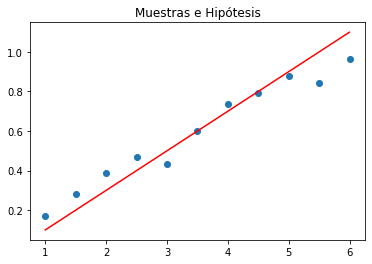

In [24]:
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])
plt.scatter(Carac,etiq)
x = np.arange(Carac.min(),Carac.max(),(Carac.max()-Carac.min())/1000)
plt.plot(x,bestParameters[0]+bestParameters[1]*x,'r-')
plt.title("Muestras e Hipótesis")
plt.show()

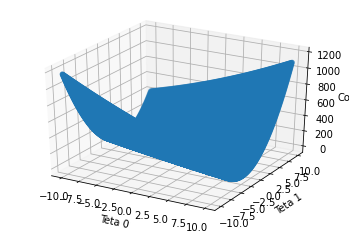

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D([p[0] for p in parameters],[p[1] for p in parameters],list(dict_resultados.values()))
ax.set_xlabel('Teta 0')
ax.set_ylabel('Teta 1')
ax.set_zlabel('Cost');